# **1. 단항 논리 회귀(Logistic Regression)**

* 분류를 할 때 사용하며 선형 회귀 공식으로부터 나왔기 때문에 논리 회귀라는 이름이 붙여짐
* 회귀 분석을 기반으로 하지만 분류 문제에 사용
* 주로 시그모이드 함수를 사용
    * 예측 값을 0과 1 사이의 값이 되도록 만듬
    * 0 에서 1 사이의 연속된 값을 출력으로 하기 때문에 보통 0.5(임계값)을 기준으로 구분
    * S자 곡선을 그리므로 미분 가능한 형태를 가지고 있어서 최적화가 용이함
    * 주어진 입력 값이 특정 클래스에 속할 확률을 계산 이진 분류 문제를 해결

<center><img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F8IXlq%2FbtsDKOmidD4%2FPfevddwbOhuVQHJG6YFbS1%2Fimg.png' width=600></center>
<br>
<center><img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fsib2q%2FbtsDJkfaBMy%2FpkKQYrLYXHVDODrXvQNqK0%2Fimg.png' width=600></center>

* 논리회귀는 입력 데이터 x에 대한 선형 결합 계산 -> 그 결과를 시그모이드 함수에 통과 시켜 출력 값을 0과 1 사이의 값으로 변환 -> 이 값을 특정 클래스에 속할 확률로 해석

In [1]:
import torch
import torch.nn as nn
import pandas as pd
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
x = torch.tensor([1.0, 2.0, 3.0])
w = torch.tensor([0.1, 0.2, 0.3])
b = torch.tensor(0.5)

In [3]:
# z = w1 * x1 + w2 * x2 + w3 * x3 + b

z = torch.dot(w, x) + b

z

tensor(1.9000)

In [4]:
sigmoid = nn.Sigmoid()
output = sigmoid(z)

output

tensor(0.8699)

In [5]:
torch.manual_seed(2024)

In [6]:
X_train = torch.FloatTensor([[0], [1], [3], [5], [8], [11], [15], [20]])
y_train = torch.FloatTensor([[0], [0], [0], [0], [1], [1], [1], [1]])

print(X_train.shape)
print(y_train.shape)

torch.Size([8, 1])
torch.Size([8, 1])


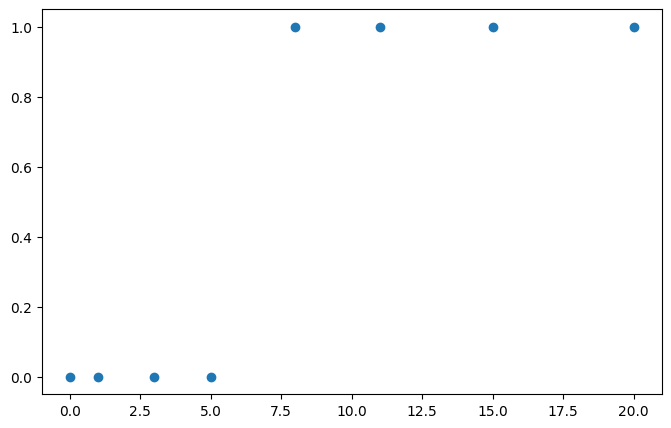

In [7]:
plt.figure(figsize = (8, 5))
plt.scatter(x = X_train, y = y_train)

In [8]:
model = nn.Sequential(
    nn.Linear(1, 1),
    nn.Sigmoid()
)

model

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): Sigmoid()
)

In [9]:
list(model.parameters()) # w : 0.0634 b : 0.6625

[Parameter containing:
 tensor([[0.0634]], requires_grad=True),
 Parameter containing:
 tensor([0.6625], requires_grad=True)]

# **3. 비용 함수**

* 논리 회귀 에서는 nn.BCELoss를 사용하여 loss를 계산
* BCE(Binary Cross Entropy)
* 1번 시그마 2번 시그마 중에서 1번 시그마는 정답이 참이었을 때 부분 2번 시그마는 정답이 거짓이었을때 부분

<img src='https://i.imgur.com/tvCuEmh.png' width='500'>

In [10]:
y_pred = model(X_train)

y_pred

tensor([[0.6598],
        [0.6739],
        [0.7012],
        [0.7270],
        [0.7631],
        [0.7958],
        [0.8340],
        [0.8734]], grad_fn=<SigmoidBackward0>)

In [11]:
loss = nn.BCELoss()(y_pred, y_train)

loss

tensor(0.6901, grad_fn=<BinaryCrossEntropyBackward0>)

In [12]:
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [13]:
epochs = 1000

for epoch in range(epochs + 1) :
    y_pred = model(X_train)
    loss = nn.BCELoss()(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0 :
        print(f'Epoch : {epoch} / {epochs} loss : {loss : .6f}')

Epoch : 0 / 1000 loss :  0.690111
Epoch : 100 / 1000 loss :  0.612832
Epoch : 200 / 1000 loss :  0.550762
Epoch : 300 / 1000 loss :  0.498473
Epoch : 400 / 1000 loss :  0.454446
Epoch : 500 / 1000 loss :  0.417278
Epoch : 600 / 1000 loss :  0.385753
Epoch : 700 / 1000 loss :  0.358851
Epoch : 800 / 1000 loss :  0.335734
Epoch : 900 / 1000 loss :  0.315727
Epoch : 1000 / 1000 loss :  0.298285


In [14]:
list(model.parameters())

[Parameter containing:
 tensor([[0.2875]], requires_grad=True),
 Parameter containing:
 tensor([-1.2444], requires_grad=True)]

In [15]:
X_test = torch.FloatTensor([[10]])
y_pred = model(X_test)

y_pred

tensor([[0.8363]], grad_fn=<SigmoidBackward0>)

In [16]:
# 임계치 설정하기
# 0.5 보다 크거나 같으면 1
# 0.5 보다 작으면 0

y_bool = (y_pred >= 0).float()

y_bool

tensor([[1.]])

# **3. 다항 논리 회귀**

In [48]:
X_train= [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 4, 5, 9],
          [1, 7, 7, 7],
          [2, 8, 7, 8]]

y_train = [0, 0, 0, 1, 1, 1, 2, 2]

In [49]:
X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(y_train)

print(X_train.shape)
print(y_train.shape)

torch.Size([8, 4])
torch.Size([8])


In [50]:
model = nn.Sequential(
    nn.Linear(4, 3)
)

print(model)

Sequential(
  (0): Linear(in_features=4, out_features=3, bias=True)
)


In [51]:
y_pred = model(X_train)

y_pred

tensor([[ 0.6099, -1.2414,  1.0875],
        [ 1.8368, -1.3832,  0.7265],
        [ 2.6530, -2.1363,  1.1298],
        [ 3.6142, -2.5097,  1.2421],
        [ 0.6095, -2.9990,  4.0870],
        [ 2.0987, -3.2101,  3.4781],
        [ 1.2736, -3.2987,  4.4039],
        [ 1.6510, -4.0570,  5.0777]], grad_fn=<AddmmBackward0>)

### 3-1. CrossEntropyLoss

* 교차 엔트로피 손실 함수는 pytorch에서 제공하는 손실 함수 중 하나로 다중 클래스 분류 문제에서 사용
* 소프트 맥스 함수와 교차 엔트로피 손실 함수를 결합한 형태
* 소프트 맥스 함수를 적용하여 각 클래스에 대한 확률 분포를 얻음
* 각 클래스에 대한 로그 확률을 계산
* 계산된 차이의 평균을 계산하여 최종 손실 값을 얻음

<center><img src='https://velog.velcdn.com/images%2Fyuns_u%2Fpost%2F712f82c2-ea39-4a3f-85d7-940e159bd15c%2Fimage.png'></center>

### 3-2. softmax

* 다중 클래스 분류 문제에서 사용되는 함수로 주어진 입력 벡터의 값을 확률 분포로 변환
* 각 클래스에 속할 확률을 계산 할 수 있으며 각 요소를 0과 1사이의 값으로 변환하여 이 값들의 합은 항상 1이 되도록 함
* 각 입력 값에 대해 지수함수를 적용
* 지수 함수를 적용한 모든 값의 합을 계산한 후 각 지수의 합으로 나누어 정규화를 함
* 정규화를 통해 각 값은 0과 1사이의 확률 값으로 출력


<center><img src='https://blog.kakaocdn.net/dn/7o3ns/btqvQDIyhq4/FYgVfbO6NaJrkc7y11f440/img.png'></center>

In [52]:
loss = nn.CrossEntropyLoss()(y_pred, y_train)

loss

tensor(2.7323, grad_fn=<NllLossBackward0>)

In [53]:
optimizer = optim.SGD(model.parameters(), lr = 0.1)

In [54]:
epochs = 1000

for epoch in range(epochs + 1) :
    y_pred = model(X_train)
    loss = nn.CrossEntropyLoss()(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0 :
        print(f'Epoch : {epoch} / {epochs} Loss: {loss : .6f}')

Epoch : 0 / 1000 Loss:  2.732275
Epoch : 100 / 1000 Loss:  0.725907
Epoch : 200 / 1000 Loss:  0.632050
Epoch : 300 / 1000 Loss:  0.575281
Epoch : 400 / 1000 Loss:  0.532752
Epoch : 500 / 1000 Loss:  0.497490
Epoch : 600 / 1000 Loss:  0.466614
Epoch : 700 / 1000 Loss:  0.438715
Epoch : 800 / 1000 Loss:  0.413015
Epoch : 900 / 1000 Loss:  0.389034
Epoch : 1000 / 1000 Loss:  0.366443


In [55]:
X_test = torch.FloatTensor([[1, 9, 9, 8]])
y_pred = model(X_test)
y_pred

tensor([[-8.9778,  1.8239, 10.0163]], grad_fn=<AddmmBackward0>)

In [56]:
y_prob = nn.Softmax(1)(y_pred)

y_prob

tensor([[5.6342e-09, 2.7668e-04, 9.9972e-01]], grad_fn=<SoftmaxBackward0>)

In [57]:
print(f'0일 확률 : {y_prob[0][0] : .10f}')
print(f'1일 확률 : {y_prob[0][1] : .10f}')
print(f'2일 확률 : {y_prob[0][2] : .10f}')

0일 확률 :  0.0000000056
1일 확률 :  0.0002766773
2일 확률 :  0.9997232556


In [60]:
torch.argmax(y_prob, axis = 1)

tensor([2])

# **4. 경사 하강법의 종류**

### 4-1. 배치 경사 하강법

* 가장 기본적인 경사 하강법(Vanila Gradient Descent)
* 데이터셋 저ㅔ를 고려하여 손실 함수를 계산
* 한 번의 epoch에 모든 파라미터 업데이트를 단 한번만 수행
* 파라미터 업데이트 할 때 한번의 전체 데이터 셋을 고려하기 때문에 모델 학습 시 많은 시간과 메모리가 필요하다는 단점이 있음

### 4-2. 확률적 경사 하강법

* 확률적 경사 하강법(Stochastic Gradient Descent) 은 배치 경사 하강법이 모델 학습 시 많은 시간과 메모리가 필요하다는 단점을 보완하기 위해 제안된 기법
* batch size를 1로 설정하여 파라미터를 업데이트 하기 때문에 배치 경사 하강법 보다 훨씬 빠르고 적은 메모리로 학습을 진행
* 파라미터 값의 업데이트 폭이 불안정 하기 때문에 정확도가 낮은 경우가 생길 수 있음

### 4-3. 미니 배치 경사 하강법

* 미니 배치 경사 하강법(Mini-Batch Gradient Descent)은 Batch Size를 설정한 size로 사용
* 배치 경사 하강법보다 모델 속도라 빠르고 확률적 경사 하강법 보다 안정적인 장점이 있음
* 딥러닝 분야에서 가장 많이 활용되는 경사 하강법
* 일반적으로 Batch Size를 4, 8, 16, 32, 64, 128 과 같이 2의 n 제곱에 해당하는 값으로 사용하는게 관례적

# **5. 경사 하강법의 여러 알고리즘**


### 5-1. SGD(확률적 경사 하강법)

* 매개변수 값을 조정 시 전체 데이터가 아니라 랜덤으로 선택한 하나의 데이터에 대해서만 계산하는 방법

### 5-2. 모멘텀(Momentum)

* 경사 하강법의 단점을 보완하기 위해 도입된 알고리즘
* 관성이라는 물리학 법칙을 응용한 방법
* 접선의 기울기의 한 시점 이전의 접선의 기울기 값을 일정한 비율만큼 반영
* 이전 기울기의 이동 평균을 사용하여 현재 기울기를 업데이트
* 가속도를 제공하여 경사 하강법보다 빠르게 최소 값에 도달 할 수 있음

### 5-3. 아다그라드(Adagrad)

* 모든 매개변수에 동일한 학습률(lr)을 적용하는 것은 비효율적이다라는 생각에서 만들어진 학습 방법
* 처음에는 크게 학습하다가 조금씩 작게 학습시킴
* 각 파라미터에 맞춤형 학습률을 적용하는 방법
* 희소한 데이터에서 유리함
* 시간이 지남에 따라 학습률이 계속 감소하여 학습을 멈출 수 있음

### 5-4. 아담(Adam)

* 모멘텀 + 아다그라
* 각 매개변수에 대해 적응형 학습률을 적용하며 과거의 기울기 정보를 활용해 현재의 학습률을 조정
* AdamW: Adam의 변형으로 L2정규화(가중치 감쇠)를 별도로 처리하여 더 나은 일반화 기능을 제공 L2정규화가 학습률 조정과 섞여 불안정한 학습을 초래할 있는 문제를 해결

# **6. 와인 품종 예측하기**

* sklearn의 Datasets.load_wine : 이탈리아의 같은 지역에서 재배된 세가지 다른 품종의 와인을 화학적으로 분석한 결과에 대한 데이터셋
* 13개의 성분을 분석하여 어떤 와인인지 구별하는 모델을 구축
* 데이터를 섞은 후 train 데이터를 80% test 데이터를 20%로 하여 사용
* Adam 사용
    * optimizer = optim.Adam(model.parameters, lr = 0.01)
* 테스트 데이터의 0번 인덱스가 어떤 와인인지 알아보자, 정확도를 출력

In [227]:
from sklearn.datasets import load_wine

In [243]:
x_data, y_data = load_wine(return_X_y = True, as_frame = True)

In [244]:
x_data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [245]:
y_data

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64

In [246]:
from sklearn.model_selection import train_test_split

In [247]:
x_data = torch.FloatTensor(x_data.values)
y_data = torch.LongTensor(y_data.values)

print(x_data.shape)
print(y_data.shape)

torch.Size([178, 13])
torch.Size([178])


In [248]:
X_train, X_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size = 0.2,
                                                    random_state = 2024)

In [249]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

torch.Size([142, 13]) torch.Size([36, 13]) torch.Size([142]) torch.Size([36])


In [250]:
model = nn.Sequential(
    nn.Linear(13, 3)
)

optimizer = optim.Adam(model.parameters(), lr = 0.01)

epochs = 1000

for epoch in range(epochs + 1) :
    y_pred = model(X_train)
    loss = nn.CrossEntropyLoss()(y_pred, y_train)
    optimizer.zero_grad
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0 :
        y_prob = nn.Softmax(1)(y_pred)
        y_pred_index = torch.argmax(y_prob, axis = 1)
        y_train_index = y_train
        accuracy = (y_pred_index == y_train_index).float().sum() / len(y_train) * 100
        print(f'Epoch {epoch : 4d} / {epochs} Loss : {loss : .6f} Accuracy : {accuracy : .2f}%')

Epoch    0 / 1000 Loss :  19.372166 Accuracy :  47.18%
Epoch  100 / 1000 Loss :  233.630783 Accuracy :  33.80%
Epoch  200 / 1000 Loss :  355.453827 Accuracy :  40.85%
Epoch  300 / 1000 Loss :  528.976135 Accuracy :  33.80%
Epoch  400 / 1000 Loss :  382.612396 Accuracy :  25.35%
Epoch  500 / 1000 Loss :  363.293732 Accuracy :  61.27%
Epoch  600 / 1000 Loss :  679.269836 Accuracy :  38.73%
Epoch  700 / 1000 Loss :  399.184814 Accuracy :  48.59%
Epoch  800 / 1000 Loss :  443.468353 Accuracy :  28.17%
Epoch  900 / 1000 Loss :  626.531311 Accuracy :  48.59%
Epoch  1000 / 1000 Loss :  555.854126 Accuracy :  69.72%


In [251]:
y_pred = model(X_test)

y_pred[: 5]

tensor([[  719.8019,   948.6874, -1042.2861],
        [ 2234.6741,   730.0267, -2365.4509],
        [  111.0648,  1282.8834,  -623.8542],
        [ 2232.3042,   860.0675, -2405.5337],
        [ 1008.3777,  1194.7943, -1487.2986]], grad_fn=<SliceBackward0>)

In [252]:
y_prob = nn.Softmax(1)(y_pred)

y_prob[: 5]

tensor([[0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.]], grad_fn=<SliceBackward0>)

In [253]:
print(f'0번 품종일 확률 : {y_prob[0][0] : .2f}')
print(f'1번 품종일 확률 : {y_prob[0][1] : .2f}')
print(f'2번 품종일 확률 : {y_prob[0][2] : .2f}')

0번 품종일 확률 :  0.00
1번 품종일 확률 :  1.00
2번 품종일 확률 :  0.00


In [254]:
y_pred_index = torch.argmax(y_prob, axis = 1)
accuracy = (y_test == y_pred_index).float().sum() / len(y_test) * 100
print(f'테스트 정확도는 {accuracy : .2f}% 입니다.')

테스트 정확도는  52.78% 입니다.
